In [1]:
import datacube
from datacube.storage.masking import mask_invalid_data

query = {
    'product': 'lc08_epsg102001',
    #'time': ('1990-01-01', '2019-01-01'),
    'lat': (48, 49),
    'lon': (-123, -124),
    'measurements': ['red', 'green', 'blue'],
}

In [2]:
dc = datacube.Datacube(app='plot-rgb-recipe')

In [3]:
#data = dc.load(product='lc08_epsg102001', measurements=['red', 'green', 'blue'], **query)
data = dc.load(**query)

In [4]:
data = mask_invalid_data(data)

In [5]:
data.green

<xarray.DataArray 'green' (time: 5, y: 5247, x: 4487)>
array([[[   nan,    nan, ...,  7119.,  7160.],
        [   nan,    nan, ...,  7373.,  7373.],
        ...,
        [   nan,    nan, ...,  6698.,  6697.],
        [   nan,    nan, ...,  6698.,  6667.]],

       [[   nan,    nan, ..., 24478., 24623.],
        [   nan,    nan, ..., 23310., 23310.],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[   nan,    nan, ...,  9135.,  9629.],
        [   nan,    nan, ...,  9644.,  9644.],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ..., 10679., 10784.],
        [   nan,    nan, ..., 10813., 10813.],
        ...,
        [   nan,    nan, ...,  8443.,  8462.],
        [   nan,    nan, ...,  8443.,  8466.]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-10-04T19:01:27.224118 ...
  * y        (y) float64 1.407e+06 1.407e

In [6]:
fake_saturation = 40000
rgb = data.to_array(dim='color')
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1]))  # make 'color' the last dimension
rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))  # mask out pixels where any band is 'saturated'
rgb /= fake_saturation  # scale to [0, 1] range for imshow

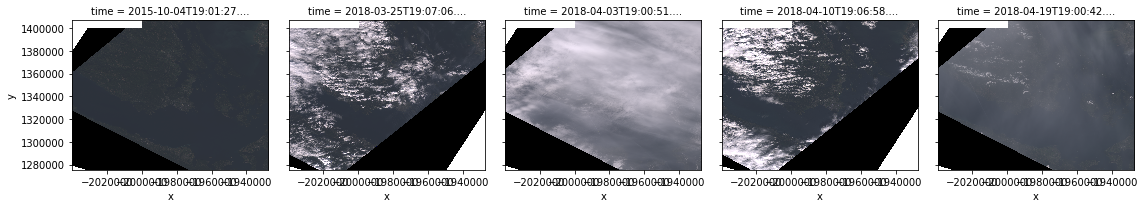

In [8]:
rgb.plot.imshow(x=data.crs.dimensions[1], y=data.crs.dimensions[0],
                col='time', col_wrap=5, add_colorbar=False)

In [ ]:
dc.list_m